# `spline_fxns` module tutorial

This tutorial showcases the usage and results of the three methods implemented in the `brainlit.algoritm.generate_fragments.spline_fxns` module:

1. `speed()`

2. `curvature()`

3. `torsion()`

This tutorial will apply the module's methods to a synthetic case where

$f: u \mapsto [u^3, \sin(u), u^2], u \in [-\pi, \pi]$

## 0. Define and evaluate the function

Here, we define and plot the function $f$

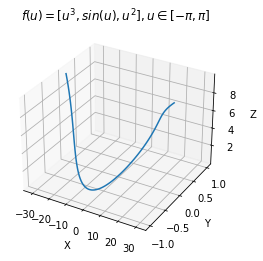

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from brainlit.algorithms.generate_fragments import spline_fxns
from scipy.interpolate import BSpline, splprep

# define the paremeter space
theta = np.linspace(-np.pi, np.pi, 100)
L = len(theta)
# define f(u)
X = theta**3
Y = np.sin(theta)
Z = theta**2
# define df(u)
dX = 3*theta**2
dY = np.cos(theta)
dZ = 2*theta
# define ddf(u)
ddX = 6*theta
ddY = -np.sin(theta)
ddZ = 2 * np.ones(L)
# define dddf(u)
dddX = 6 * np.ones(L)
dddY = -np.cos(theta)
dddZ = np.zeros(L)

C = np.array([X, Y, Z])
dC = np.array([dX, dY, dZ]).T
ddC = np.array([ddX, ddY, ddZ]).T
dddC = np.array([dddX, dddY, dddZ]).T

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot(X, Y, Z)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(r"$f(u) = [u^3, sin(u), u^2], u \in [-\pi, \pi]$")
plt.show()

## 1. Speed

The speed measures how fast a point is moving on a parametric curve. 

Let $F: \mathbf{R} \to \mathbf{R}^d$, the speed is the $\ell^2$-norm of $\mathbf{J} = \left[\frac{\partial F_i}{\partial x}, \dots , \frac{\partial F_d}{\partial x}\right]$.

Given $u_1, \dots, u_N$ evaluation points of the parameter, the expected speed vector $\mathbf{S}$ for $f$ is

$\mathbf{S}_i = \sqrt{(3u_i^2)^2 + (\cos(u_i))^2 + (2u_i)^2}$

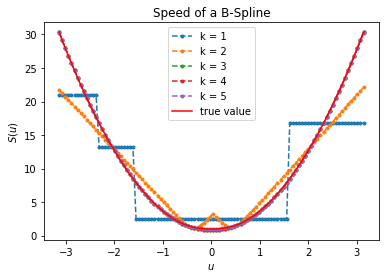

In [2]:
for k in [1, 2, 3, 4, 5]:
    tck, u = splprep(C, u=theta, k=k)
    t = tck[0]
    c = tck[1]
    k = tck[2]
    speed = spline_fxns.speed(theta, t, c, k, aux_outputs=False)
    plt.plot(theta, speed, "o--",  label="k = %d" % k, markersize=3)

# evaluate the expected value
expected_speed = np.linalg.norm(dC, axis=1)

plt.plot(theta, expected_speed, c="r", label="true value")
plt.xlabel(r"$u$")
plt.ylabel(r"$S(u)$")
plt.title("Speed of a B-Spline")
plt.legend()

## 2. Curvature

The curvature measures the failure of a curve to be a straight line. 

Let $F: \mathbf{R} \to \mathbf{R}^d$, 

Given $u_1, \dots, u_N$ evaluation points of the parameter, the expected curvature vector $\mathbf{k}$ for $f$ is

$\mathbf{k} = \lVert f'(u) \times f''(u) \rVert \quad / \quad \lVert f'(u) \rVert^3$

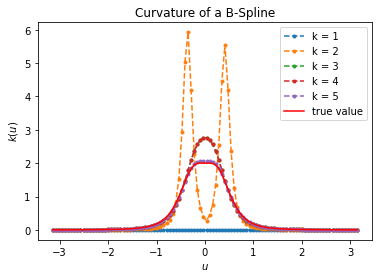

In [3]:
for k in [1, 2, 3, 4, 5]:
    tck, u = splprep(C, u=theta, k=k)
    t = tck[0]
    c = tck[1]
    k = tck[2]
    curvature, deriv, dderiv = spline_fxns.curvature(theta, t, c, k, aux_outputs=True)
    plt.plot(theta, curvature, "o--", label="k = %d" % k, markersize=3)

# evalute the expected value
cross = np.cross(dC, ddC)
num = np.linalg.norm(cross, axis=1)
denom = np.linalg.norm(dC, axis=1) ** 3
expected_curvature = np.nan_to_num(num / denom)

plt.plot(theta, expected_curvature, c="r", label="true value")
plt.xlabel(r"$u$")
plt.ylabel(r"$k(u)$")
plt.title("Curvature of a B-Spline")
plt.legend()

## 2. Torsion

The torsion measures the failure of a curve to be planar. 

Let $F: \mathbf{R} \to \mathbf{R}^d$, 

Given $u_1, \dots, u_N$ evaluation points of the parameter, the expected torsion vector $\mathbf{k}$ for $f$ is

$\mathbf{\tau} = \lvert f'(u), f''(u), f'''(u) \rvert \quad / \quad \lVert f'(u) \times f''(u) \rVert^2$

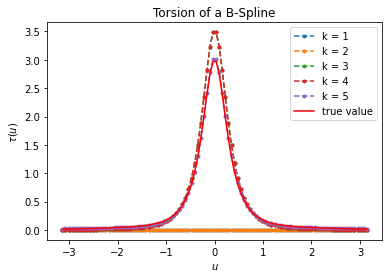

In [4]:
for k in [1, 2, 3, 4, 5]:
    tck, u = splprep(C, u=theta, k=k)
    t = tck[0]
    c = tck[1]
    k = tck[2]
    torsion = spline_fxns.torsion(theta, t, c, k, aux_outputs=False)
    plt.plot(theta, torsion, "o--", label="k = %d" % k, markersize=3)
    
# evaluate expected value
expected_cross = np.cross(dC, ddC)
expected_num = np.diag((expected_cross @ dddC.T))
expected_denom = np.linalg.norm(expected_cross, axis=1) ** 2
expected_torsion = np.nan_to_num(expected_num / expected_denom)

plt.plot(theta, expected_torsion, c="r", label="true value")
plt.xlabel(r"$u$")
plt.ylabel(r"$\tau(u)$")
plt.title("Torsion of a B-Spline")
plt.legend()